In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_IG.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.032073,0.584587,0.517158,0.511626,0.396204,0.523567,0.400107,0.497321,0.463135,0.456587,0.526603,0.411268,0.507779,0.321350,0.437807,0.389493,0.394455,4
1,1997-02-28 00:00:00,0.022910,0.593261,0.509066,0.551748,0.466362,0.494901,0.455225,0.503095,0.605420,0.427400,0.512503,0.411863,0.501391,0.331717,0.463633,0.371790,0.400467,4
2,1997-03-31 00:00:00,0.013746,0.477740,0.317745,0.511322,0.405427,0.457001,0.448342,0.478600,0.528539,0.411794,0.528331,0.420693,0.524060,0.342466,0.418786,0.345951,0.383512,4
3,1997-04-30 00:00:00,0.022910,0.697805,0.685033,0.448404,0.513258,0.478501,0.542739,0.470552,0.588306,0.392140,0.521106,0.431853,0.513958,0.358566,0.445930,0.308511,0.380955,4
4,1997-05-31 00:00:00,0.032073,0.643998,0.607264,0.468161,0.451746,0.516262,0.714240,0.426636,0.569584,0.410815,0.517072,0.440628,0.540596,0.363678,0.441016,0.285278,0.339880,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,277.000000,277.000000,274.000000,274.000000,270.000000,270.000000,267.000000,267.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.417782,0.494780,0.503562,0.482637,0.502400,0.492097,0.498393,0.491650,0.504837,0.509006,0.492070,0.501216,0.509136,2.55914
std,0.243309,0.227093,0.207410,0.224126,0.208517,0.216277,0.201213,0.212409,0.208761,0.226952,0.198216,0.196648,0.187849,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.238259,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.375716,0.516951,0.505593,0.477463,0.484370,0.501543,0.487557,0.504171,0.498794,0.502269,0.492280,0.526284,0.541649,3.00000
75%,0.542955,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               231 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 85th percentile (top 15%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 85th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.85) # every data point over the 85th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.6231386025000001


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.762821,0.551055,0.608889,0.583114,0.620401,0.582464,0.585654,0.586920,0.605977,0.705459,0.648175,0.663046,0.665962,2.400000
std,0.102601,0.332849,0.270657,0.299085,0.294255,0.314039,0.311140,0.299890,0.311847,0.190711,0.128668,0.075695,0.070171,1.116718
min,0.627721,0.000000,0.025155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.298562,0.344911,0.439550,0.509455,1.000000
25%,0.671249,0.278597,0.475572,0.412376,0.517443,0.522829,0.575287,0.608099,0.583067,0.570418,0.593066,0.618532,0.629663,1.000000
50%,0.746850,0.598677,0.630874,0.688205,0.732672,0.692107,0.708318,0.690303,0.747908,0.771474,0.681418,0.671275,0.670379,3.000000
75%,0.845361,0.839788,0.822063,0.810373,0.795245,0.804611,0.783079,0.786105,0.808449,0.847841,0.740782,0.711686,0.718019,3.000000
max,0.966781,1.000000,1.000000,1.000000,1.000000,0.915222,0.907077,0.874431,0.938608,0.998973,0.876645,0.810577,0.805064,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 3-mo (Treasury)  35.0  0.551055  0.332849  0.056262   
 2                         combined  70.0  0.656938  0.266744  0.031882   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.436718  0.665393  
 2   0.593335  0.720541  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.2118
 1                              Degrees of freedom =   68.0000
 2                                               t =    3.5969
 3                           Two side test p value =    0.0006
 4                          Difference < 0 p value =    0.9997
 5                          Difference > 0 p value =    0.0003
 6                                       Cohen's d =    0.8598
 7                                       Hedge's g =    0.8503
 8                        

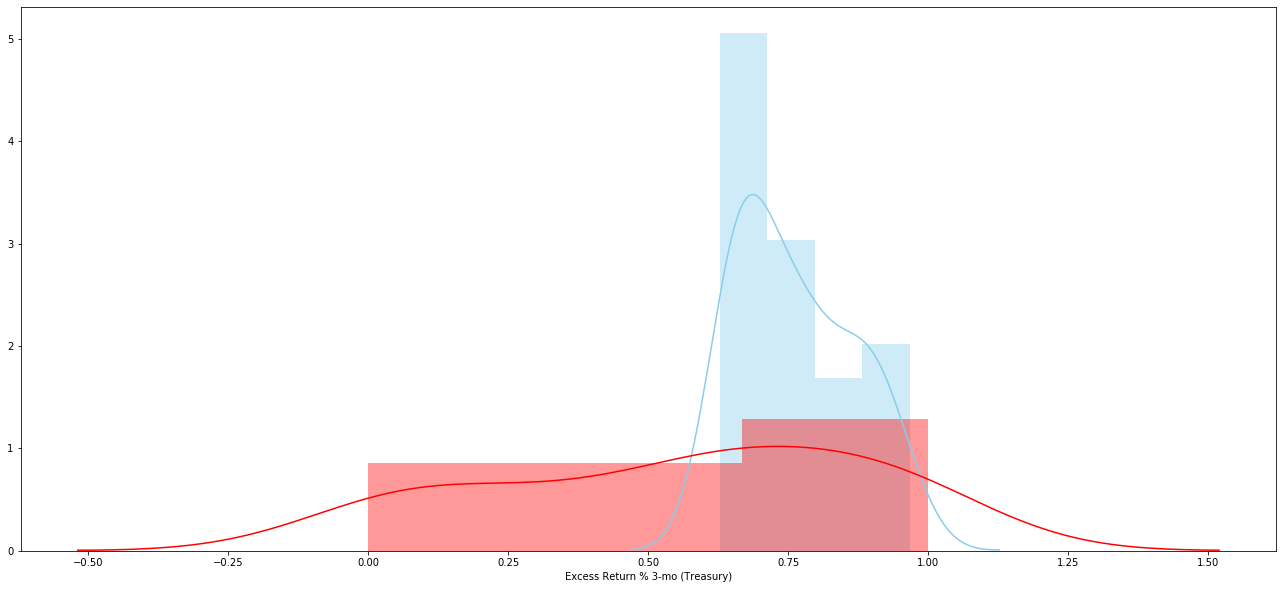

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  35.0  0.762821  0.102601  0.017343   0.727576   
 1  Excess Return % 3-mo (Agg)  35.0  0.608889  0.270657  0.045749   0.515916   
 2                    combined  70.0  0.685855  0.217471  0.025993   0.634001   
 
    Interval  
 0  0.798066  
 1  0.701863  
 2  0.737709  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.1539
 1                             Degrees of freedom =   68.0000
 2                                              t =    3.1462
 3                          Two side test p value =    0.0025
 4                         Difference < 0 p value =    0.9988
 5                         Difference > 0 p value =    0.0012
 6                                      Cohen's d =    0.7521
 7                                      Hedge's g =    0.7438
 8                                  Glass's delta =    

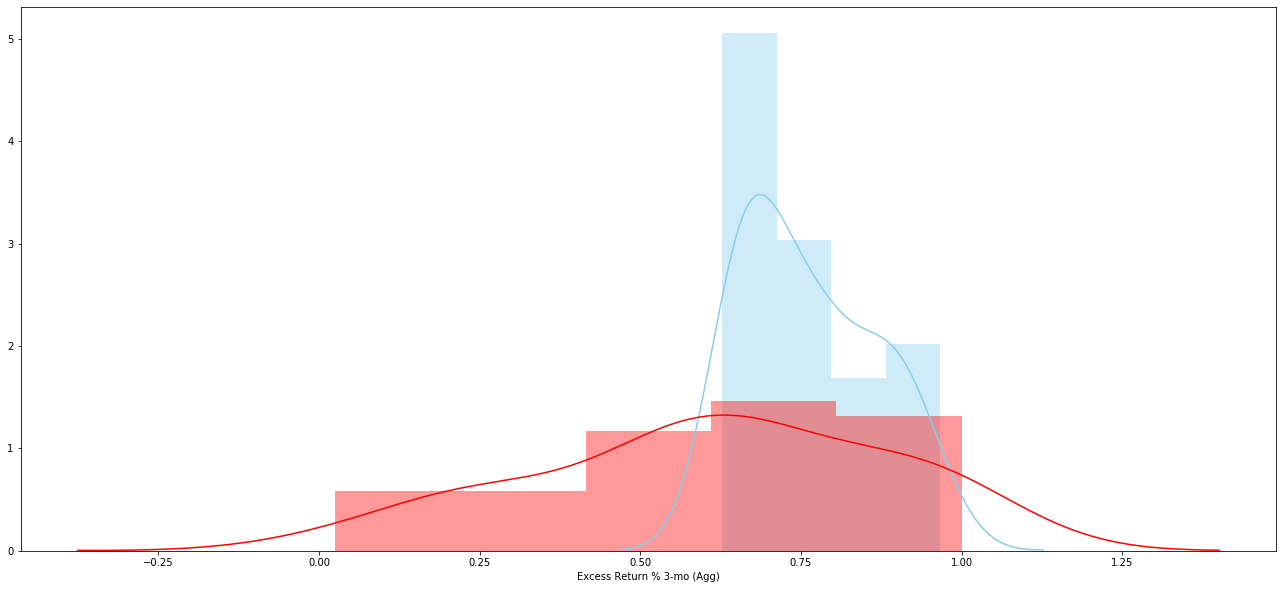

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 6-mo (Treasury)  35.0  0.583114  0.299085  0.050555   
 2                         combined  70.0  0.672968  0.239699  0.028650   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.480375  0.685853  
 2   0.615813  0.730122  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.1797
 1                              Degrees of freedom =   68.0000
 2                                               t =    3.3624
 3                           Two side test p value =    0.0013
 4                          Difference < 0 p value =    0.9994
 5                          Difference > 0 p value =    0.0006
 6                                       Cohen's d =    0.8038
 7                                       Hedge's g =    0.7949
 8                        

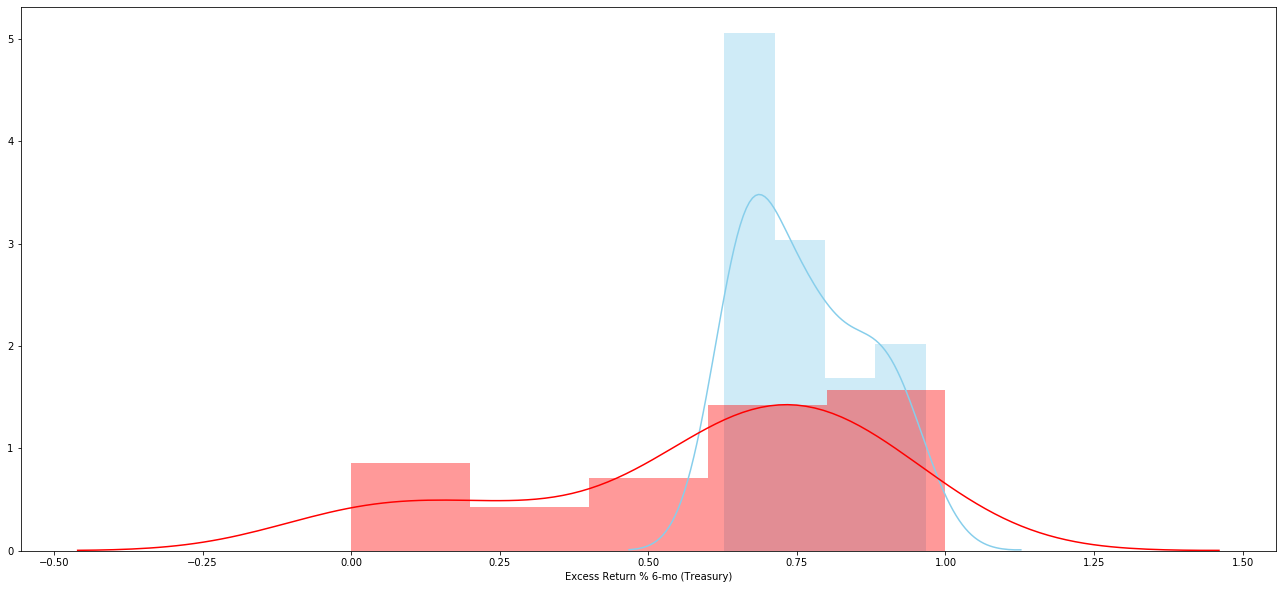

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  35.0  0.762821  0.102601  0.017343   0.727576   
 1  Excess Return % 6-mo (Agg)  35.0  0.620401  0.294255  0.049738   0.519320   
 2                    combined  70.0  0.691611  0.230211  0.027516   0.636719   
 
    Interval  
 0  0.798066  
 1  0.721481  
 2  0.746503  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1424
 1                             Degrees of freedom =   68.0000
 2                                              t =    2.7038
 3                          Two side test p value =    0.0087
 4                         Difference < 0 p value =    0.9957
 5                         Difference > 0 p value =    0.0043
 6                                      Cohen's d =    0.6463
 7                                      Hedge's g =    0.6392
 8                                  Glass's delta =    

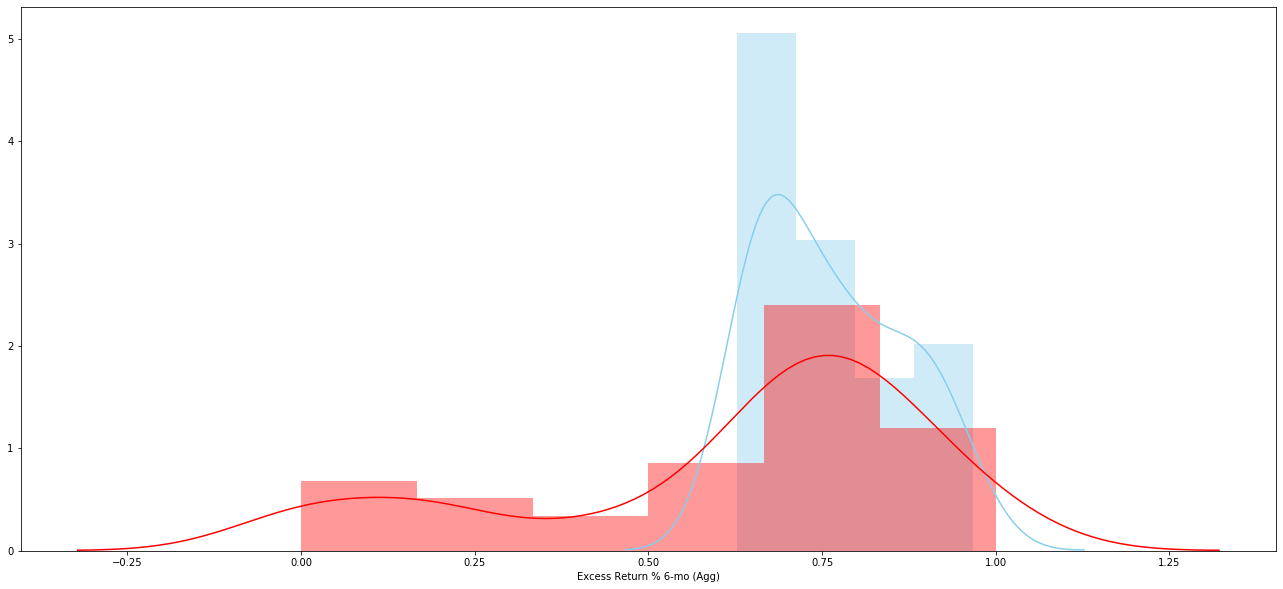

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 9-mo (Treasury)  35.0  0.582464  0.314039  0.053082   
 2                         combined  70.0  0.672642  0.249064  0.029769   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.474588  0.690340  
 2   0.613255  0.732030  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.1804
 1                              Degrees of freedom =   68.0000
 2                                               t =    3.2297
 3                           Two side test p value =    0.0019
 4                          Difference < 0 p value =    0.9990
 5                          Difference > 0 p value =    0.0010
 6                                       Cohen's d =    0.7720
 7                                       Hedge's g =    0.7635
 8                        

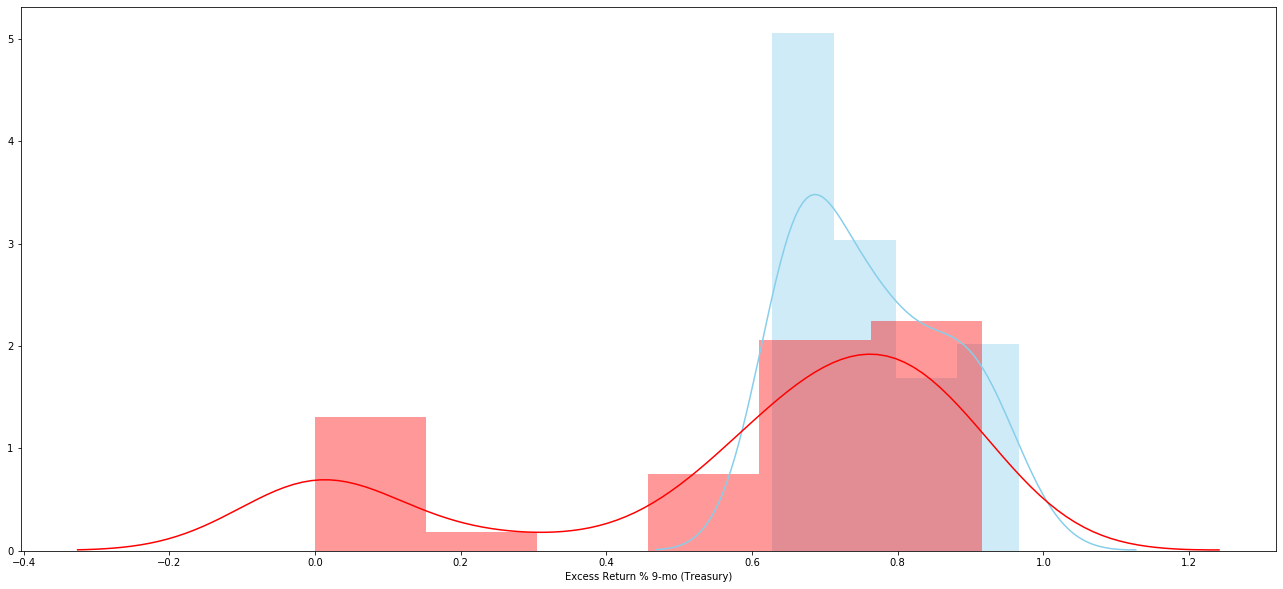

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  35.0  0.762821  0.102601  0.017343   0.727576   
 1  Excess Return % 9-mo (Agg)  35.0  0.585654  0.311140  0.052592   0.478773   
 2                    combined  70.0  0.674237  0.246679  0.029484   0.615419   
 
    Interval  
 0  0.798066  
 1  0.692534  
 2  0.733056  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.1772
 1                             Degrees of freedom =   68.0000
 2                                              t =    3.1992
 3                          Two side test p value =    0.0021
 4                         Difference < 0 p value =    0.9990
 5                         Difference > 0 p value =    0.0010
 6                                      Cohen's d =    0.7648
 7                                      Hedge's g =    0.7563
 8                                  Glass's delta =    

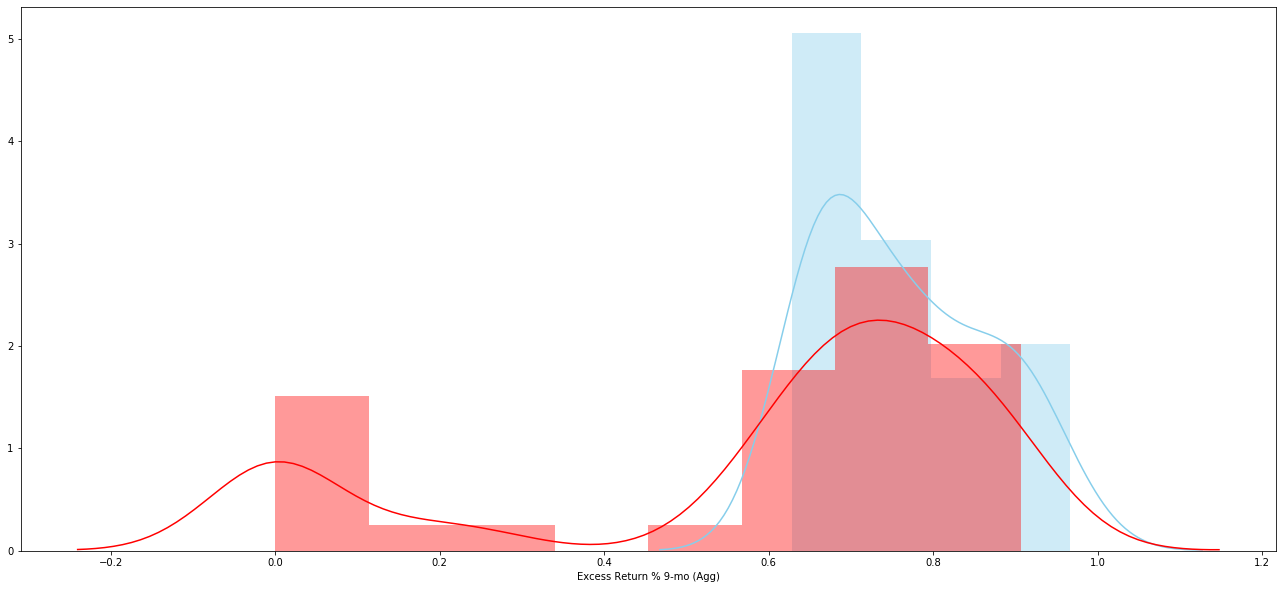

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 12-mo (Treasury)  35.0  0.586920  0.299890  0.050691   
 2                          combined  70.0  0.674871  0.239478  0.028623   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.483904  0.689936  
 2   0.617769  0.731972  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.1759
 1                              Degrees of freedom =   68.0000
 2                                               t =    3.2833
 3                           Two side test p value =    0.0016
 4                          Difference < 0 p value =    0.9992
 5                          Difference > 0 p value =    0.0008
 6                                       Cohen's d =    0.7848
 7                                       Hedge's g =    0.7762
 8                    

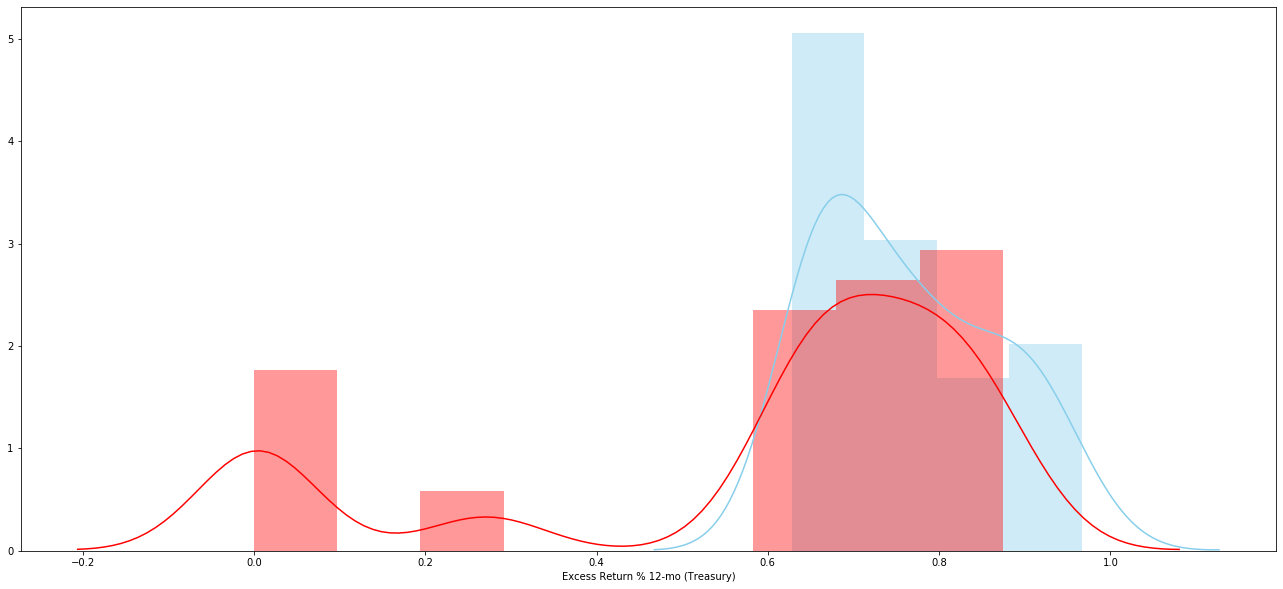

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  35.0  0.762821  0.102601  0.017343   0.727576   
 1  Excess Return % 12-mo (Agg)  35.0  0.605977  0.311847  0.052712   0.498853   
 2                     combined  70.0  0.684399  0.243610  0.029117   0.626312   
 
    Interval  
 0  0.798066  
 1  0.713100  
 2  0.742486  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1568
 1                              Degrees of freedom =   68.0000
 2                                               t =    2.8265
 3                           Two side test p value =    0.0062
 4                          Difference < 0 p value =    0.9969
 5                          Difference > 0 p value =    0.0031
 6                                       Cohen's d =    0.6757
 7                                       Hedge's g =    0.6682
 8                                   Glass

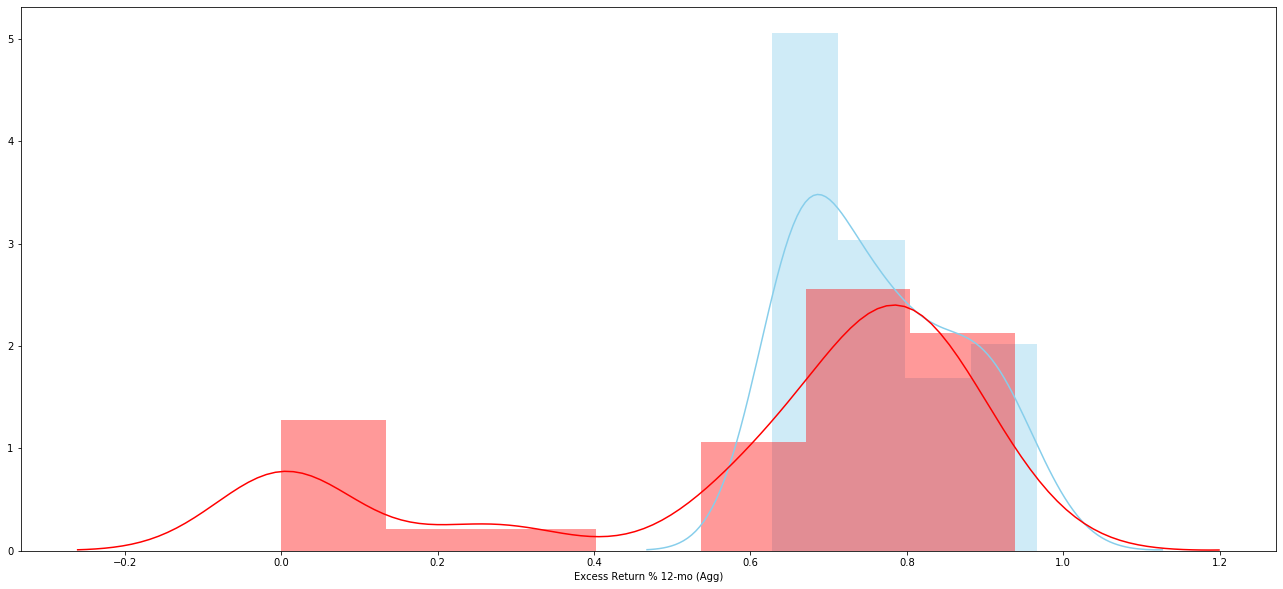

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 24-mo (Treasury)  35.0  0.705459  0.190711  0.032236   
 2                          combined  70.0  0.734140  0.154737  0.018495   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.639948  0.770971  
 2   0.697244  0.771036  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.0574
 1                              Degrees of freedom =   68.0000
 2                                               t =    1.5670
 3                           Two side test p value =    0.1217
 4                          Difference < 0 p value =    0.9391
 5                          Difference > 0 p value =    0.0609
 6                                       Cohen's d =    0.3746
 7                                       Hedge's g =    0.3704
 8                    

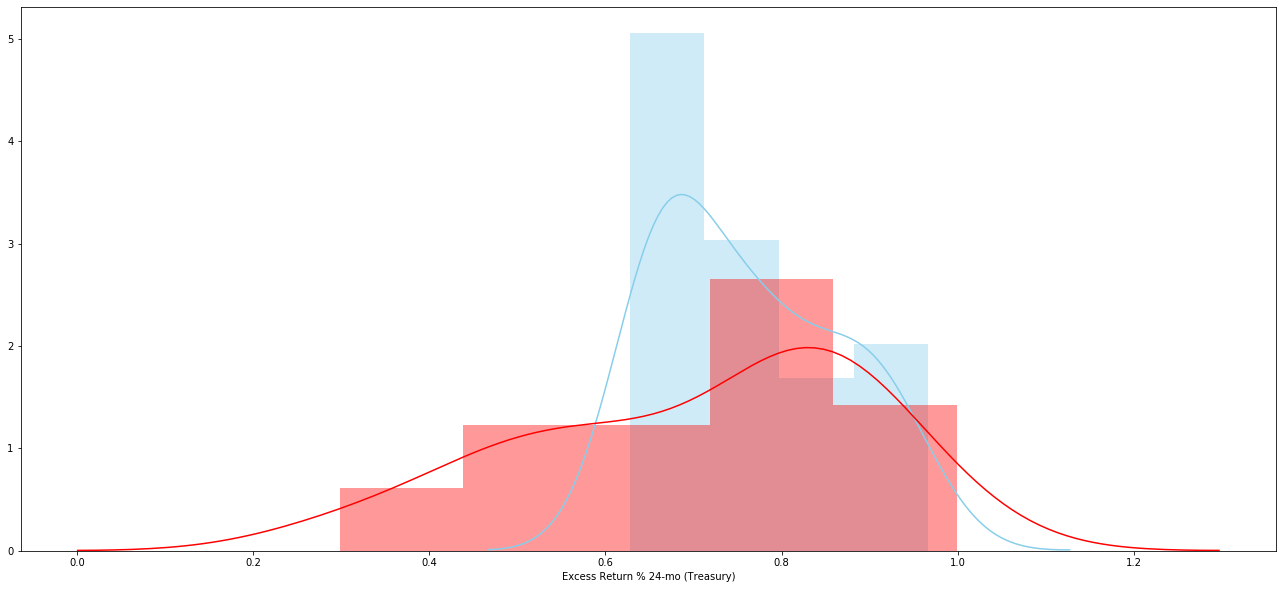

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  35.0  0.762821  0.102601  0.017343   0.727576   
 1  Excess Return % 24-mo (Agg)  35.0  0.648175  0.128668  0.021749   0.603976   
 2                     combined  70.0  0.705498  0.129146  0.015436   0.674704   
 
    Interval  
 0  0.798066  
 1  0.692374  
 2  0.736292  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.1146
 1                              Degrees of freedom =   68.0000
 2                                               t =    4.1214
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    0.9852
 7                                       Hedge's g =    0.9743
 8                                   Glass

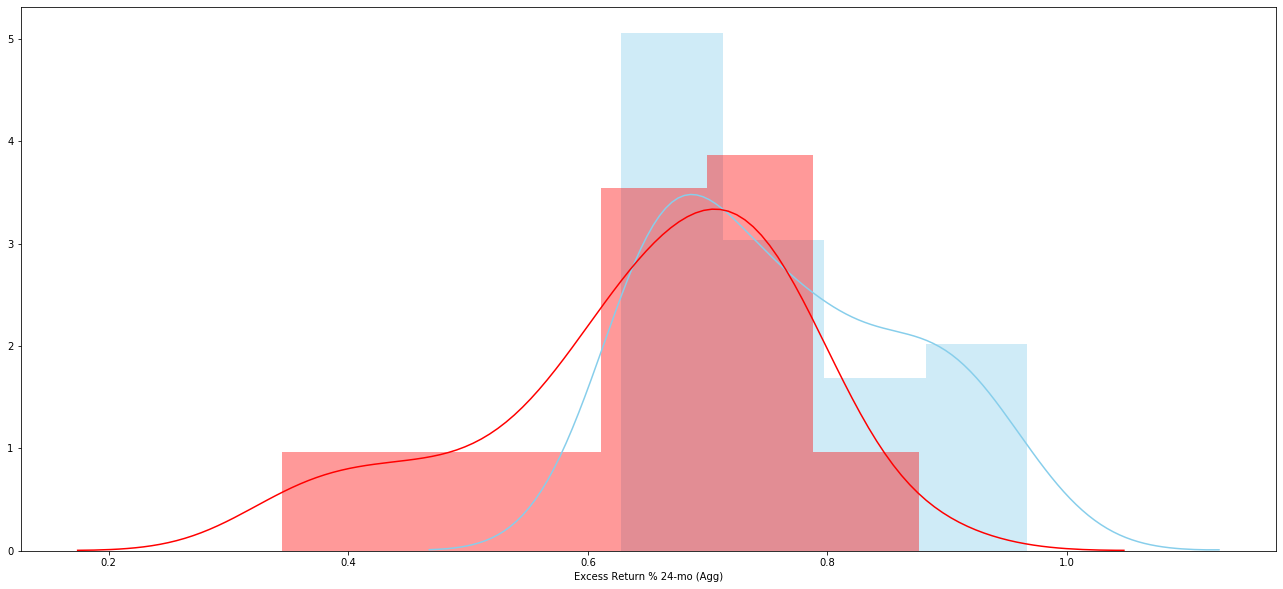

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 36-mo (Treasury)  35.0  0.663046  0.075695  0.012795   
 2                          combined  70.0  0.712934  0.102642  0.012268   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.637044  0.689048  
 2   0.688460  0.737408  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.0998
 1                              Degrees of freedom =   68.0000
 2                                               t =    4.6296
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.1067
 7                                       Hedge's g =    1.0944
 8                    

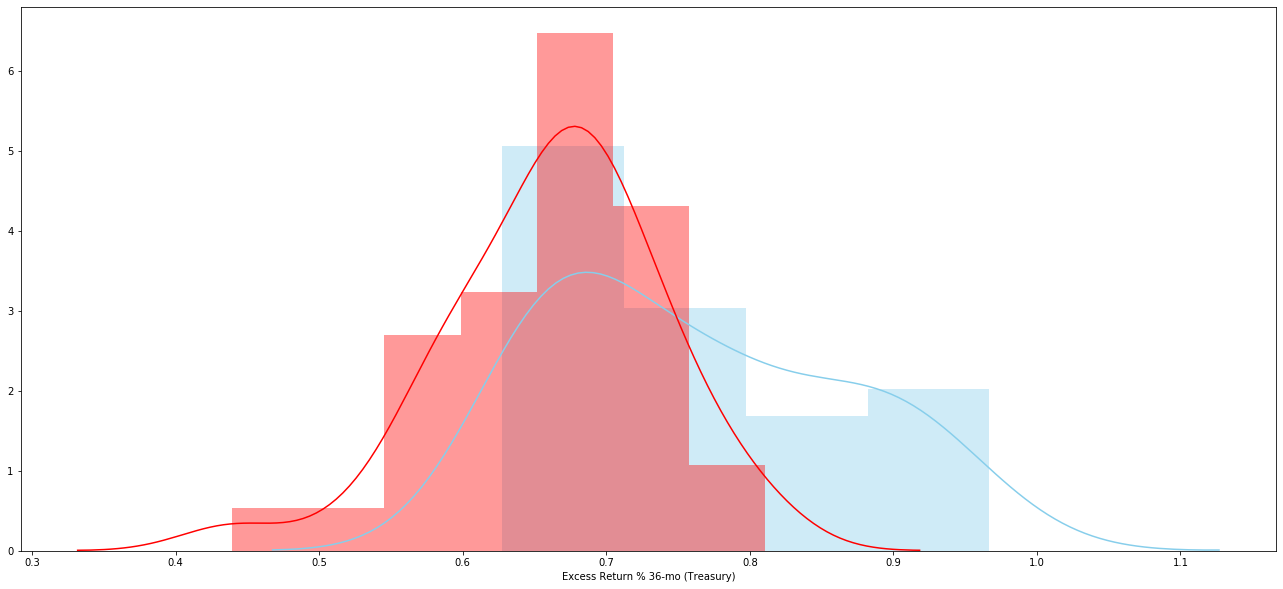

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  35.0  0.762821  0.102601  0.017343   0.727576   
 1  Excess Return % 36-mo (Agg)  35.0  0.665962  0.070171  0.011861   0.641858   
 2                     combined  70.0  0.714392  0.099965  0.011948   0.690556   
 
    Interval  
 0  0.798066  
 1  0.690067  
 2  0.738227  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.0969
 1                              Degrees of freedom =   68.0000
 2                                               t =    4.6099
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.1020
 7                                       Hedge's g =    1.0898
 8                                   Glass

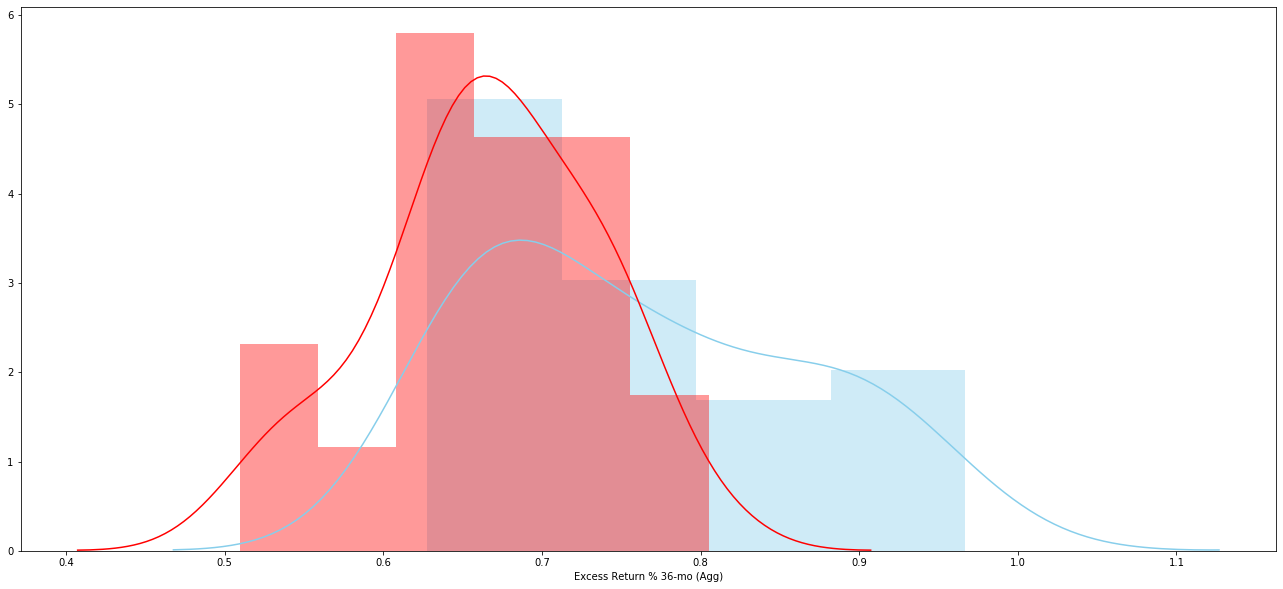

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_IG.csv') 

In [36]:
df1.describe()

,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,279.000000,279.000000,279.000000,277.000000,277.000000,274.000000,274.000000,270.000000,270.000000,267.000000,267.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.417782,0.610519,0.534440,0.504132,0.499413,0.494780,0.503562,0.482637,0.502400,0.492097,0.498393,0.491650,0.504837,0.509006,0.492070,0.501216,0.509136,2.55914
std,0.243309,0.118164,0.137960,0.243397,0.228002,0.227093,0.207410,0.224126,0.208517,0.216277,0.201213,0.212409,0.208761,0.226952,0.198216,0.196648,0.187849,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.238259,0.555074,0.456258,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.375716,0.614830,0.539434,0.521049,0.502388,0.516951,0.505593,0.477463,0.484370,0.501543,0.487557,0.504171,0.498794,0.502269,0.492280,0.526284,0.541649,3.00000
75%,0.542955,0.673396,0.622920,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 3-mo (Treasury)  277.0  0.494780  0.227093  0.013645   
 2                         combined  312.0  0.524849  0.232587  0.013168   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.467919  0.521641  
 2   0.498940  0.550758  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2680
 1                              Degrees of freedom =   310.0000
 2                                               t =     6.8870
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2355
 7                                       Hedge's g =     1.2325
 8           

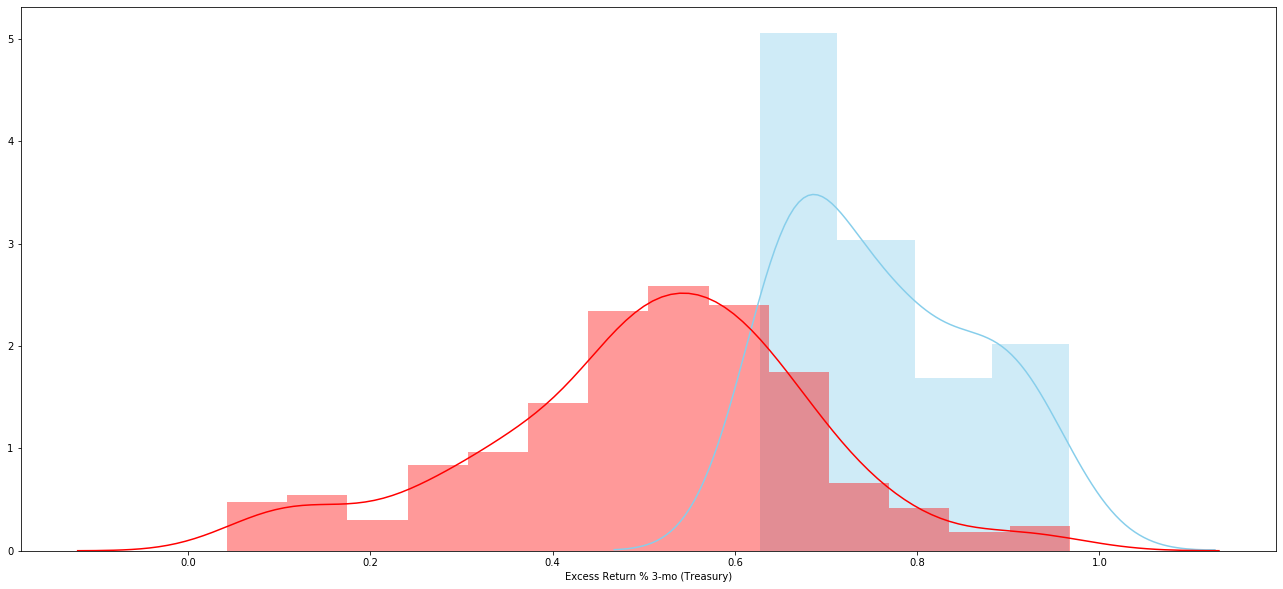

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   35.0  0.762821  0.102601  0.017343   0.727576   
 1  Excess Return % 3-mo (Agg)  277.0  0.503562  0.207410  0.012462   0.479029   
 2                    combined  312.0  0.532646  0.214579  0.012148   0.508743   
 
    Interval  
 0  0.798066  
 1  0.528095  
 2  0.556549  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2593
 1                             Degrees of freedom =   310.0000
 2                                              t =     7.2757
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3052
 7                                      Hedge's g =     1.3021
 8                                  Glass'

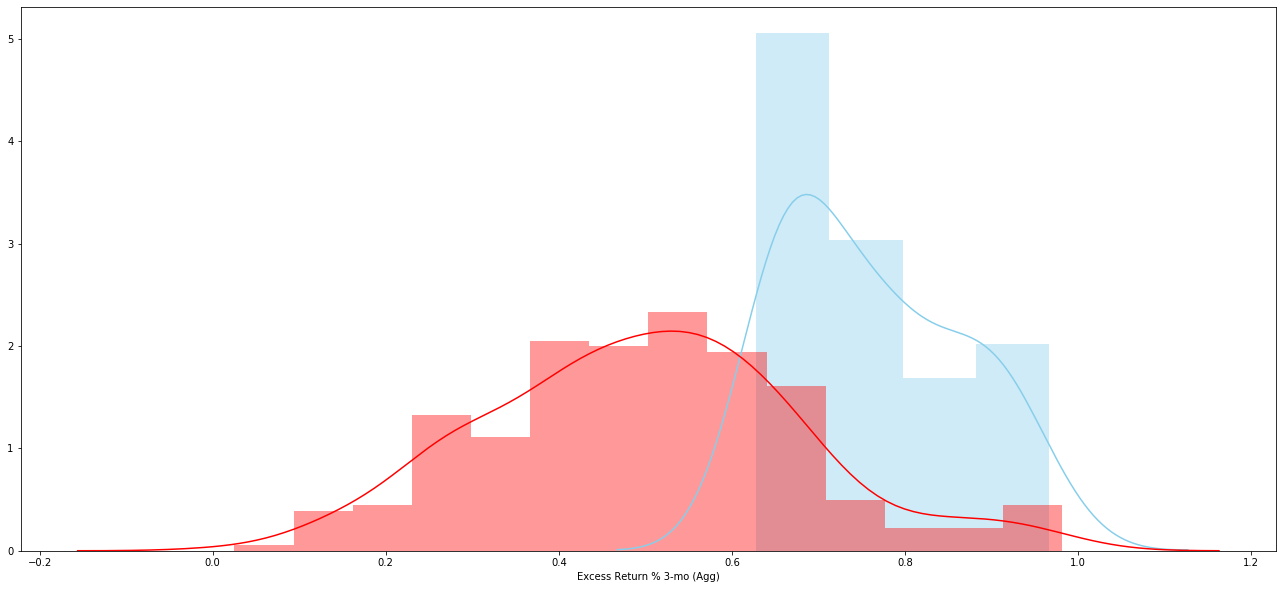

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 6-mo (Treasury)  274.0  0.482637  0.224126  0.013540   
 2                         combined  309.0  0.514373  0.231509  0.013170   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.455981  0.509293  
 2   0.488459  0.540288  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2802
 1                              Degrees of freedom =   307.0000
 2                                               t =     7.2908
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3087
 7                                       Hedge's g =     1.3055
 8           

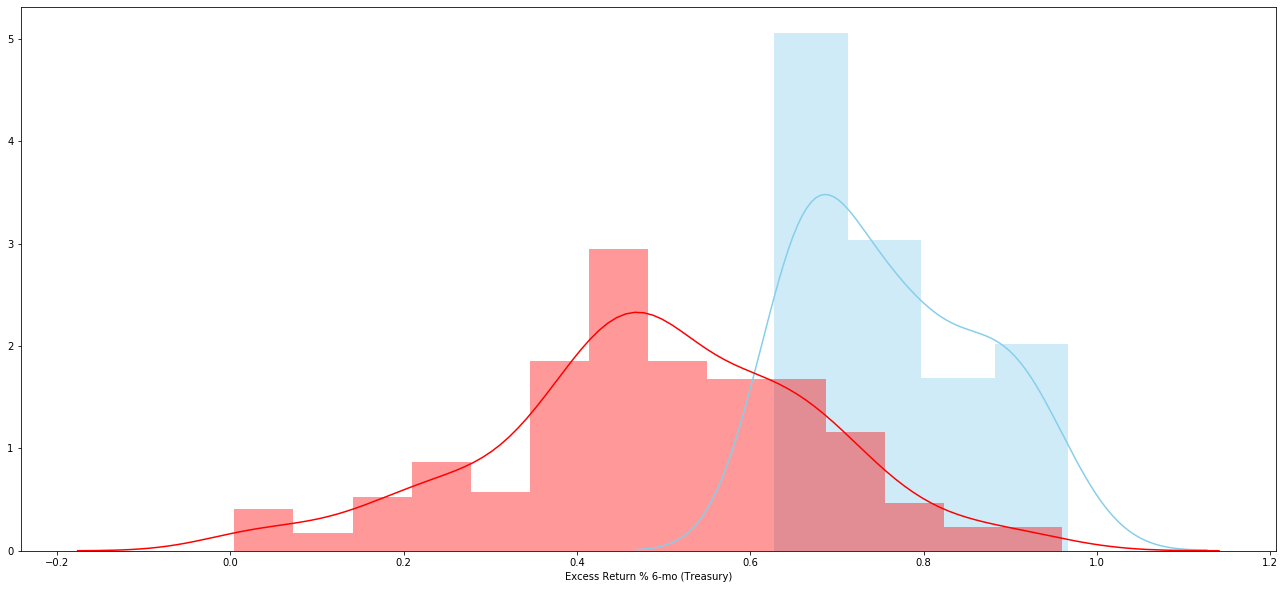

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   35.0  0.762821  0.102601  0.017343   0.727576   
 1  Excess Return % 6-mo (Agg)  274.0  0.502400  0.208517  0.012597   0.477601   
 2                    combined  309.0  0.531898  0.215718  0.012272   0.507751   
 
    Interval  
 0  0.798066  
 1  0.527200  
 2  0.556045  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2604
 1                             Degrees of freedom =   307.0000
 2                                              t =     7.2694
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3049
 7                                      Hedge's g =     1.3017
 8                                  Glass'

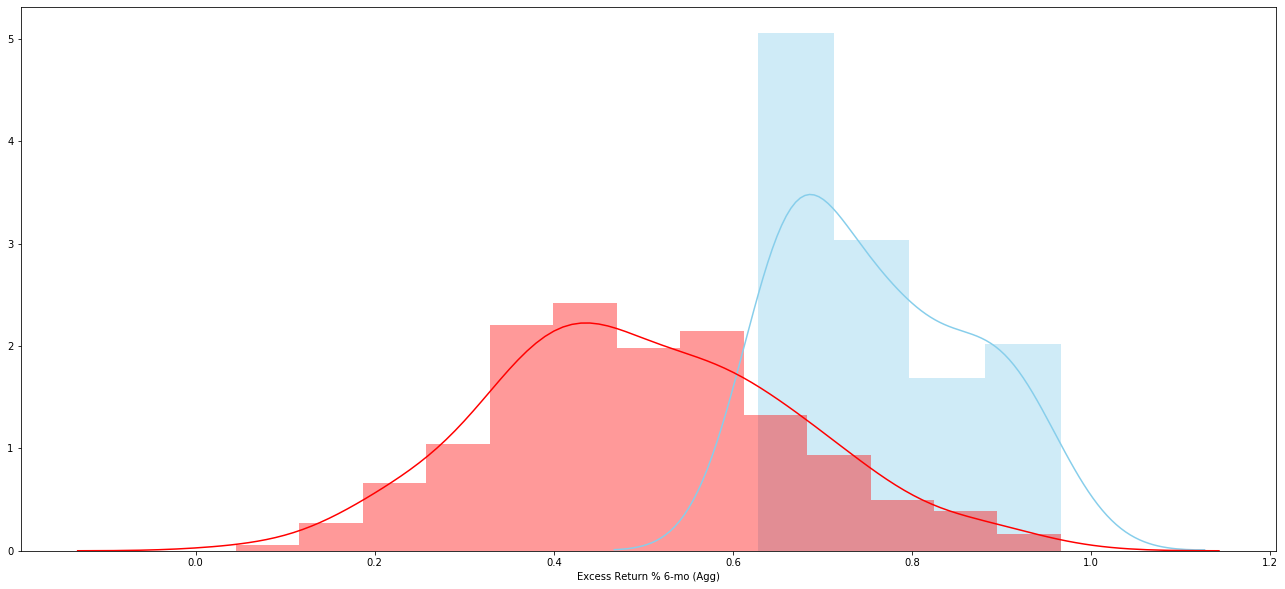

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 9-mo (Treasury)  270.0  0.492097  0.216277  0.013162   
 2                         combined  305.0  0.523164  0.223691  0.012808   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.466183  0.518011  
 2   0.497959  0.548368  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2707
 1                              Degrees of freedom =   303.0000
 2                                               t =     7.2918
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3100
 7                                       Hedge's g =     1.3068
 8           

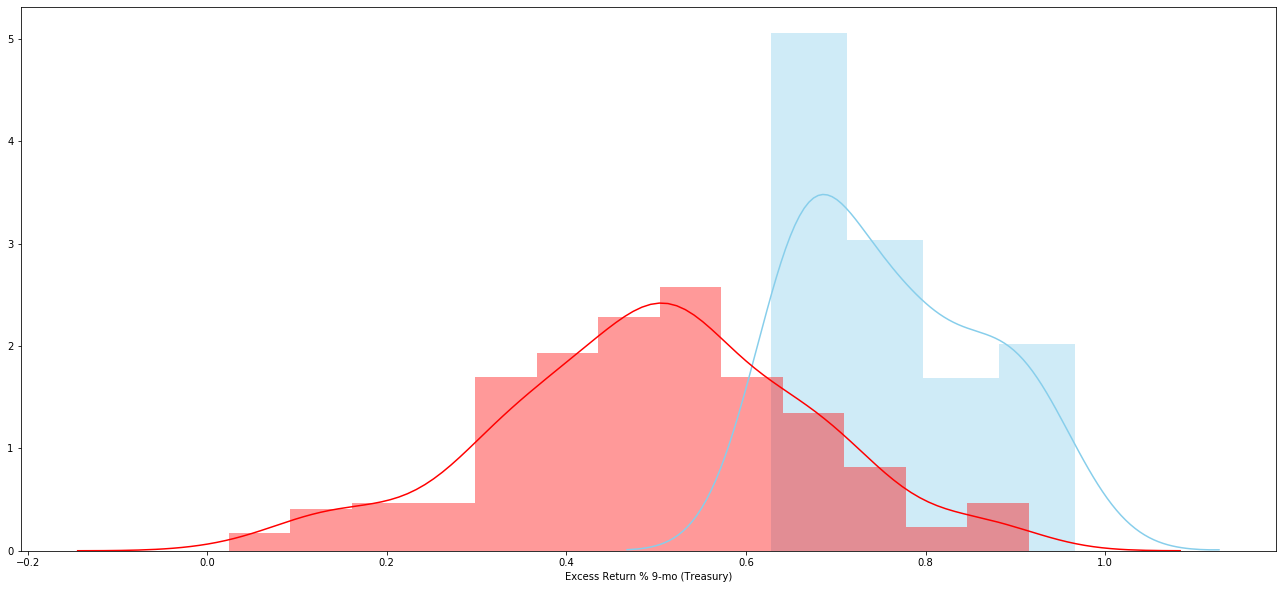

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   35.0  0.762821  0.102601  0.017343   0.727576   
 1  Excess Return % 9-mo (Agg)  270.0  0.498393  0.201213  0.012245   0.474284   
 2                    combined  305.0  0.528737  0.210070  0.012029   0.505067   
 
    Interval  
 0  0.798066  
 1  0.522502  
 2  0.552407  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2644
 1                             Degrees of freedom =   303.0000
 2                                              t =     7.6391
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3724
 7                                      Hedge's g =     1.3690
 8                                  Glass'

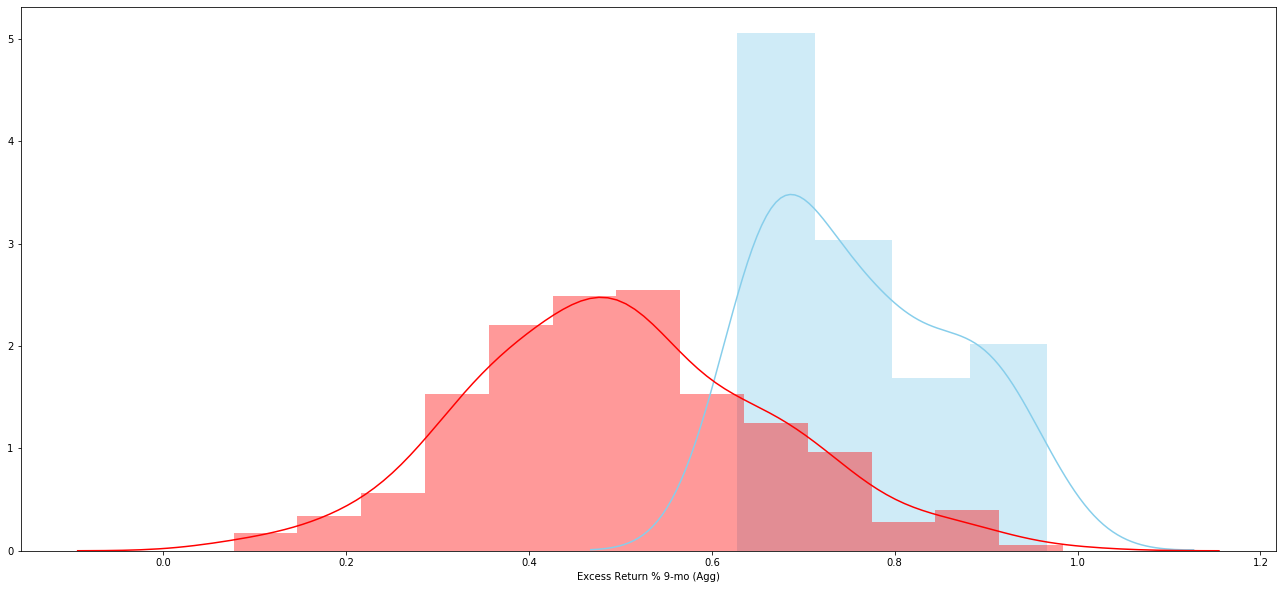

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 12-mo (Treasury)  267.0  0.491650  0.212409  0.012999   
 2                          combined  302.0  0.523077  0.220499  0.012688   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.466056  0.517245  
 2   0.498108  0.548046  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2712
 1                              Degrees of freedom =   300.0000
 2                                               t =     7.4318
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3360
 7                                       Hedge's g =     1.3327
 8       

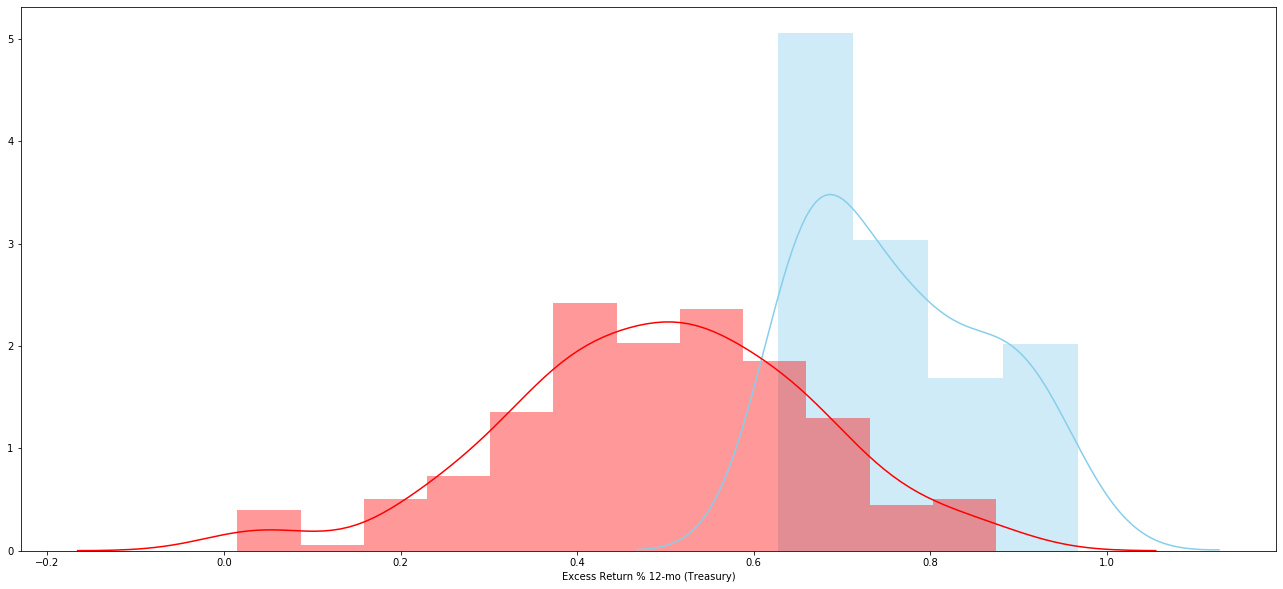

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 12-mo (Agg)  267.0  0.504837  0.208761  0.012776   
 2                     combined  302.0  0.534736  0.215742  0.012415   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.479682  0.529992  
 2   0.510306  0.559166  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2580
 1                              Degrees of freedom =   300.0000
 2                                               t =     7.1903
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2926
 7                                       Hedge's g =     1.2894
 8                           

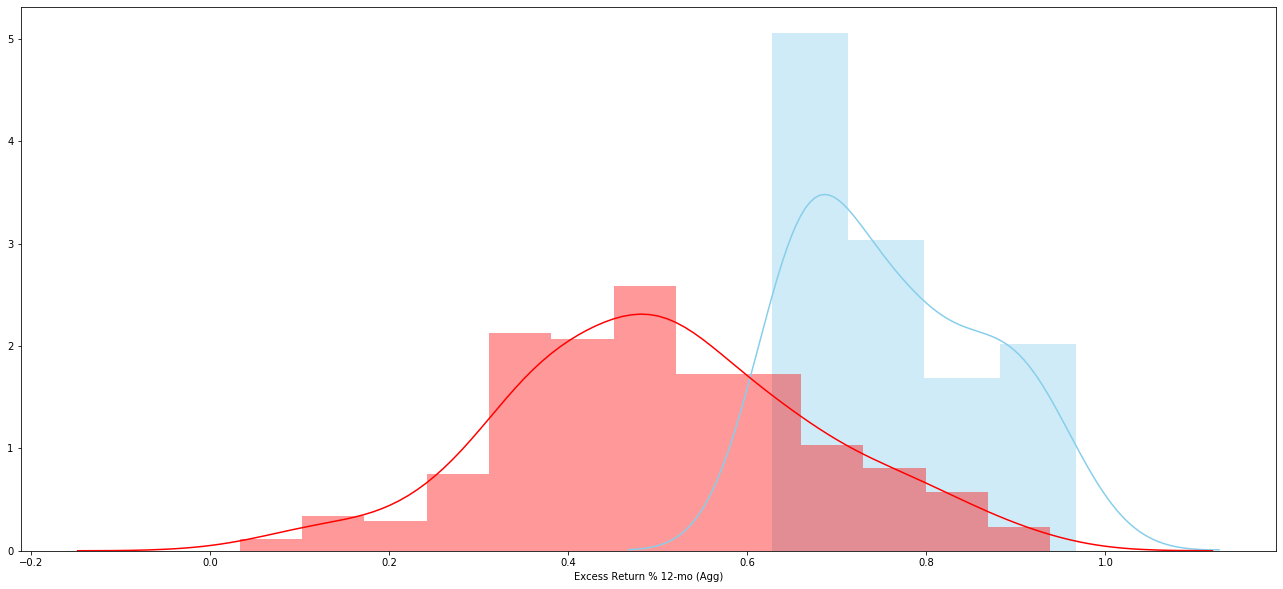

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 24-mo (Treasury)  257.0  0.509006  0.226952  0.014157   
 2                          combined  292.0  0.539429  0.231001  0.013518   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.481127  0.536885  
 2   0.512823  0.566035  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2538
 1                              Degrees of freedom =   290.0000
 2                                               t =     6.5186
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1745
 7                                       Hedge's g =     1.1714
 8       

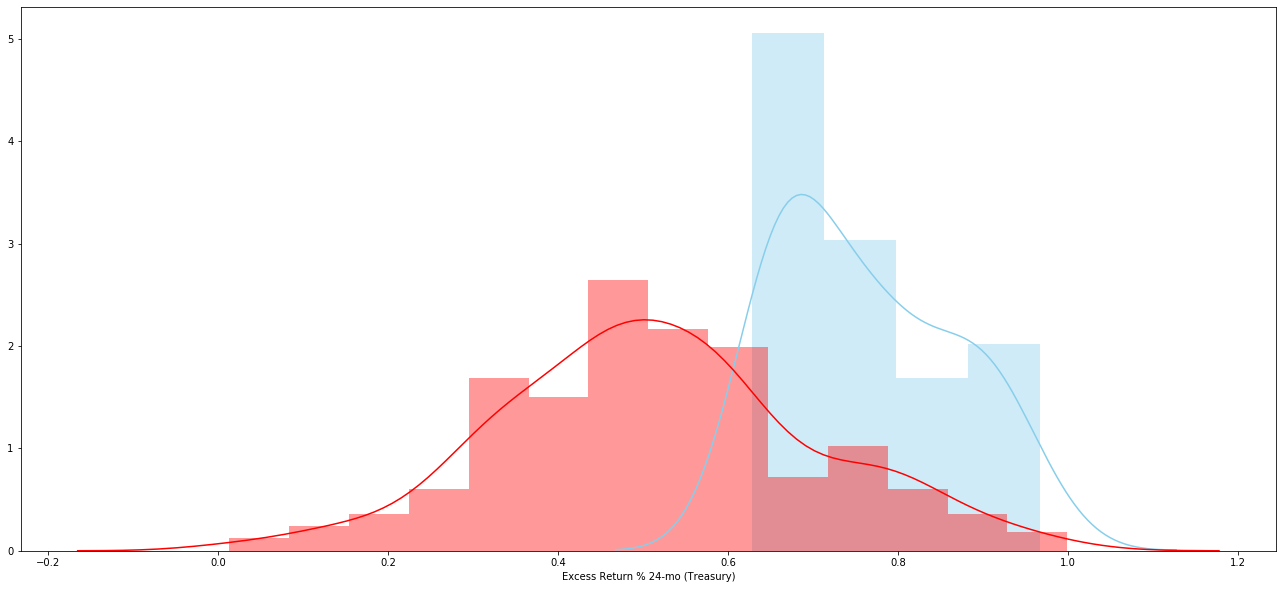

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 24-mo (Agg)  257.0  0.492070  0.198216  0.012364   
 2                     combined  292.0  0.524523  0.208696  0.012213   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.467721  0.516419  
 2   0.500486  0.548560  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2708
 1                              Degrees of freedom =   290.0000
 2                                               t =     7.9292
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4286
 7                                       Hedge's g =     1.4249
 8                           

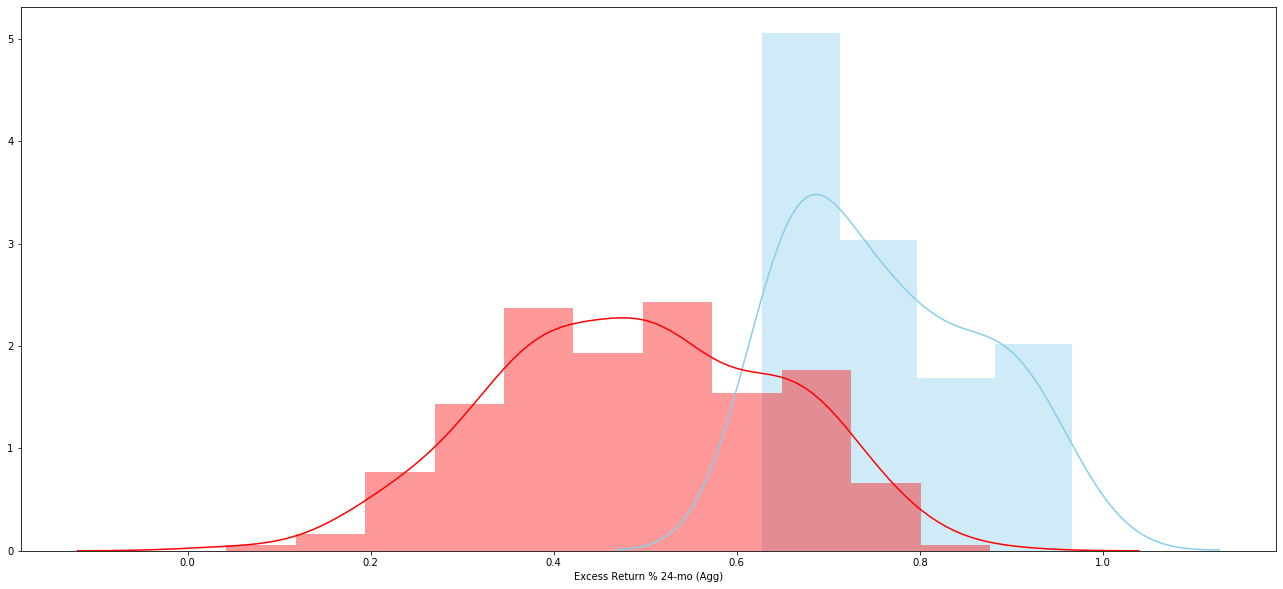

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 36-mo (Treasury)  245.0  0.501216  0.196648  0.012563   
 2                          combined  280.0  0.533917  0.206432  0.012337   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.476470  0.525962  
 2   0.509632  0.558201  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2616
 1                              Degrees of freedom =   278.0000
 2                                               t =     7.7133
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3938
 7                                       Hedge's g =     1.3900
 8       

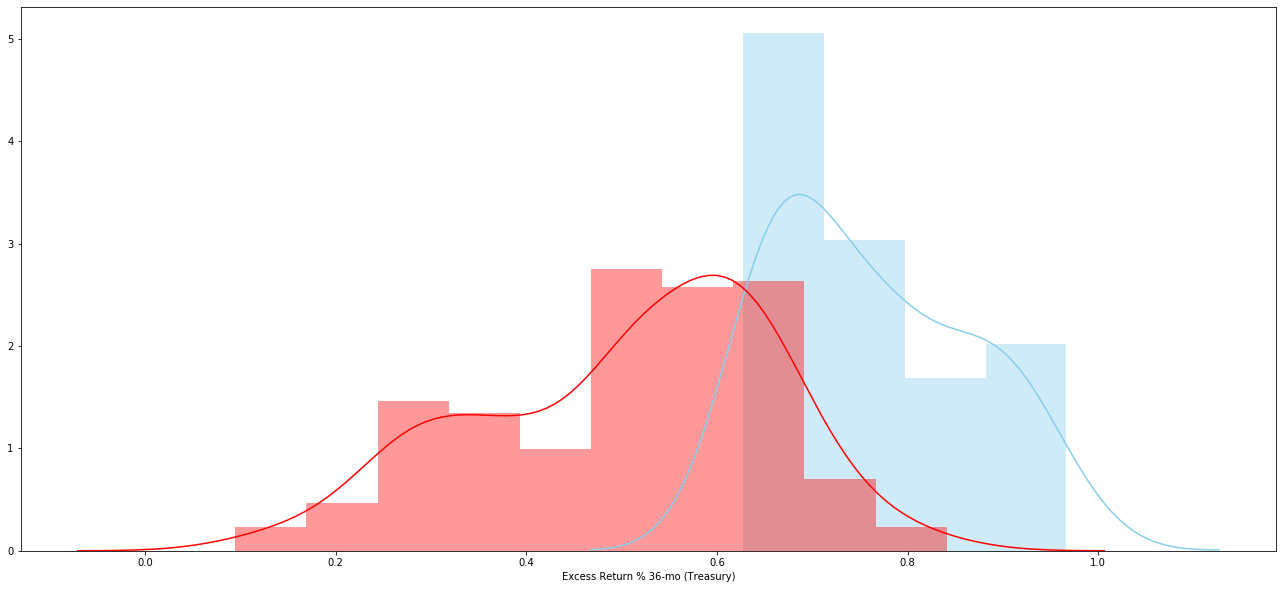

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   35.0  0.762821  0.102601  0.017343   
 1  Excess Return % 36-mo (Agg)  245.0  0.509136  0.187849  0.012001   
 2                     combined  280.0  0.540847  0.198009  0.011833   
 
    95% Conf.  Interval  
 0   0.727576  0.798066  
 1   0.485497  0.532775  
 2   0.517553  0.564141  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2537
 1                              Degrees of freedom =   278.0000
 2                                               t =     7.8164
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4124
 7                                       Hedge's g =     1.4086
 8                           

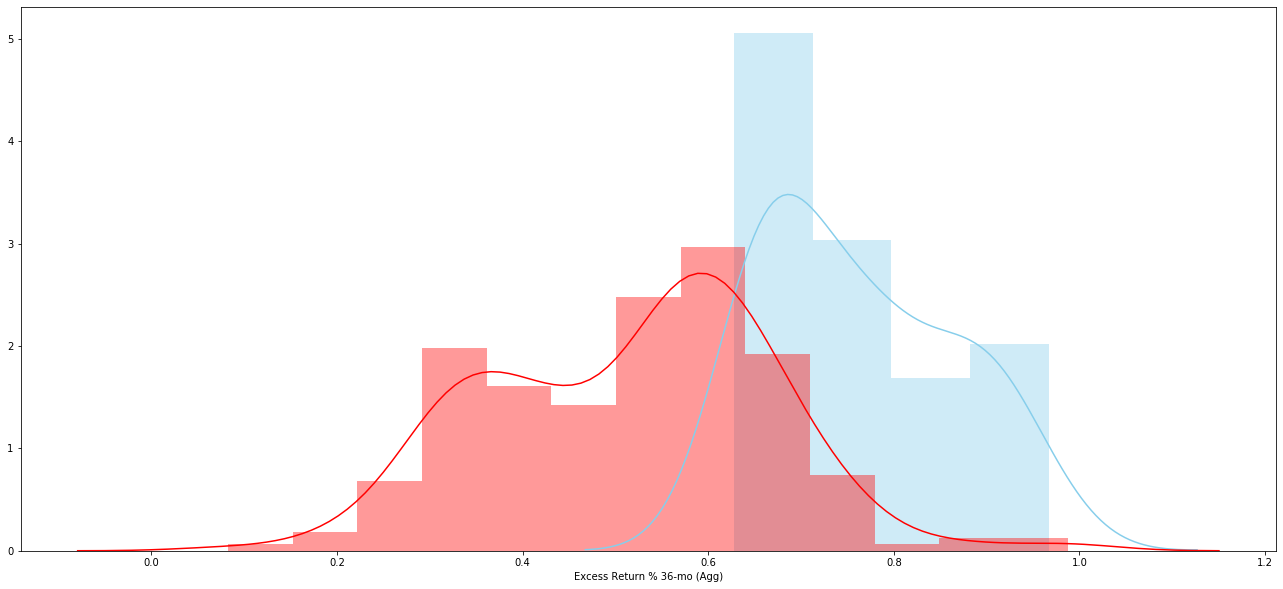

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")